<a href="https://colab.research.google.com/github/y-lims/DADS6003_StockForecasting/blob/main/T_Limsukhawat_AppleInc_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz

!tar -xzvf ta-lib-0.4.0-src.tar.gz

%cd ta-lib

!./configure --prefix=/usr

!make

!make install

--2023-09-22 15:58:29--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-09-22 15:58:29--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://cfhcable.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-09-22 15:58:29--  http://cfhcable.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving cfhcable.dl.s

In [2]:
!pip install pandas
!pip install numpy
!pip install requests
!pip install lxml
!pip install yfinance
!pip install talib
!pip install numpy
!pip install ta-lib

ERROR: Could not find a version that satisfies the requirement talib (from versions: none)
ERROR: No matching distribution found for talib
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.1/357.1 kB 6.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for ta-lib: filename=TA_Lib-0.4.28-cp310-cp310-linux_x86_64.whl size=2017490 sha256=202370af9d1c6b3c88b94a8f73200cdea3ccb6f22c71fa9f836812aa5d106cfb
  Stored in directory: /root/.cache/pip/wheels/66/54/9d/10bfd00931c0c993f373269d350635df520b5064e5290a9d94
Successfully built ta-lib


In [3]:
# Data Manipulation
import numpy as np
import pandas as pd

# Technical Indicators
import talib as ta

# Plotting graphs
import matplotlib.pyplot as plt

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# Data fetching
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [4]:
df = pdr.get_data_yahoo('AAPL', '2000-01-01', '2023-09-01')
df = df.dropna()
df = df.iloc[:,:4]
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close
Date,,,,
2000-01-03,0.936384,1.004464,0.907924,0.999442
2000-01-04,0.966518,0.987723,0.903460,0.915179
2000-01-05,0.926339,0.987165,0.919643,0.928571
2000-01-06,0.947545,0.955357,0.848214,0.848214
2000-01-07,0.861607,0.901786,0.852679,0.888393


In [5]:
df['S_10'] = df['Close'].rolling(window=10).mean()
df['Corr'] = df['Close'].rolling(window=10).corr(df['S_10'])
df['RSI'] = ta.RSI(np.array(df['Close']), timeperiod =10)
df['Open-Close'] = df['Open'] - df['Close'].shift(1)
df['Open-Open'] = df['Open'] - df['Open'].shift(1)
df = df.dropna()
X = df.iloc[:,:9]

In [6]:
y = np.where(df['Close'].shift(-1) > df['Close'],1,-1)

In [7]:
split = int(0.7*len(df))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [8]:
model = LogisticRegression()
model = model.fit (X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,Open,[0.35568023943386]
1,High,[0.1503207280726496]
2,Low,[0.18946841375827583]
3,Close,[-0.6042691906642497]
4,S_10,[-0.09265748913201757]
5,Corr,[0.0260830392896722]
6,RSI,[0.002827689218794327]
7,Open-Close,[0.2942499408505882]
8,Open-Open,[-0.1944162931449338]


In [10]:
probability = model.predict_proba(X_test)
print(probability)

[[0.48295286 0.51704714]
 [0.49248921 0.50751079]
 [0.49845118 0.50154882]
 ...
 [0.88232706 0.11767294]
 [0.83539674 0.16460326]
 [0.46655745 0.53344255]]


In [11]:
probability = model.predict_proba(X_test)
print(probability)

predicted = model.predict(X_test)

[[0.48295286 0.51704714]
 [0.49248921 0.50751079]
 [0.49845118 0.50154882]
 ...
 [0.88232706 0.11767294]
 [0.83539674 0.16460326]
 [0.46655745 0.53344255]]


In [12]:
print(metrics.confusion_matrix(y_test, predicted))

[[451 382]
 [466 482]]


In [13]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

          -1       0.49      0.54      0.52       833
           1       0.56      0.51      0.53       948

    accuracy                           0.52      1781
   macro avg       0.52      0.52      0.52      1781
weighted avg       0.53      0.52      0.52      1781



In [14]:
print(model.score(X_test,y_test))

0.523862998315553


In [15]:
cross_val = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print(cross_val)
print(cross_val.mean())

[0.46801347 0.52020202 0.503367   0.52356902 0.48484848 0.50841751
 0.50421585 0.49578415 0.54637437 0.51770658]
0.5072498452768268


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


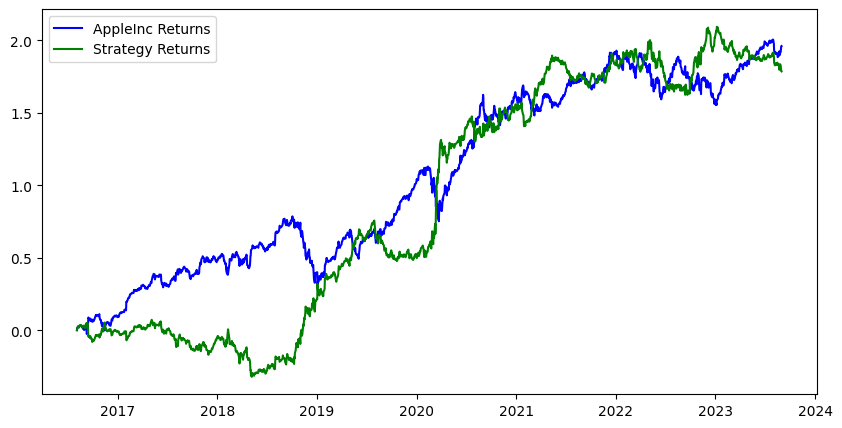

In [20]:
df['Predicted_Signal'] = model.predict(X)
df['AppleInc_returns'] = np.log(df['Close']/df['Close'].shift(1))
Cumulative_Nifty_returns = np.cumsum(df[split:]['AppleInc_returns'])

df['Startegy_returns'] = df['AppleInc_returns']* df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(df[split:]['Startegy_returns'])

plt.figure(figsize=(10,5))
plt.plot(Cumulative_Nifty_returns, color='b',label = 'AppleInc Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()